In [71]:
import h5py
import numpy as np
import pandas as pd 
from cesium import featurize
import matplotlib.pyplot as plt
import seaborn as sns 
plt.rcParams["figure.figsize"] = [16,9]
sns.set_style('whitegrid')

GRID_SIZE = 0.06
LOWER_LAMBDA = 6472.5
UPPER_LAMBDA = 6740
PLOT_MASK = range(1475,1550)

In [72]:
hf_spec = h5py.File("/home/pravn/Dropbox/Masters/Research Data/resampled_emission_spectra.h5", "r")
hf_grid = h5py.File("/home/pravn/Dropbox/Masters/Research Data/wl_grid.h5", "r")

wl_grid = np.array(hf_grid["wl_grid"])
df = pd.DataFrame(hf_spec["spectra"])

In [73]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,4449,4450,4451,4452,4453,4454,4455,4456,4457,4458
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [74]:
hf_spec.close()
hf_grid.close()

In [75]:
df_masked = df.loc[:,PLOT_MASK]
df_masked_np = df_masked.to_numpy()

In [76]:
features_to_use = ["amplitude","maximum","median"]

In [77]:
wl_grid_array = np.tile(wl_grid[PLOT_MASK], (df_masked_np.shape[0],1))

In [78]:
wl_grid_array.shape

(6977, 75)

In [79]:
df_masked_np.shape

(6977, 75)

In [80]:
wl_grid_list = list(wl_grid_array)

In [81]:
df_masked_list = list(df_masked_np)

In [83]:
fset_cesium = featurize.featurize_time_series(times=wl_grid_list ,values=df_masked_list, errors=None,features_to_use=features_to_use)

In [84]:
print(fset_cesium.head())

feature amplitude   maximum    median
channel         0         0         0
0        0.255384  0.842837  0.704987
1        0.161495  1.187498  1.047707
2        0.318583  1.585654  1.074062
3        0.173698  0.988212  0.894343
4        0.133566  0.961354  0.838300


In [43]:
type(fset_cesium)

pandas.core.frame.DataFrame

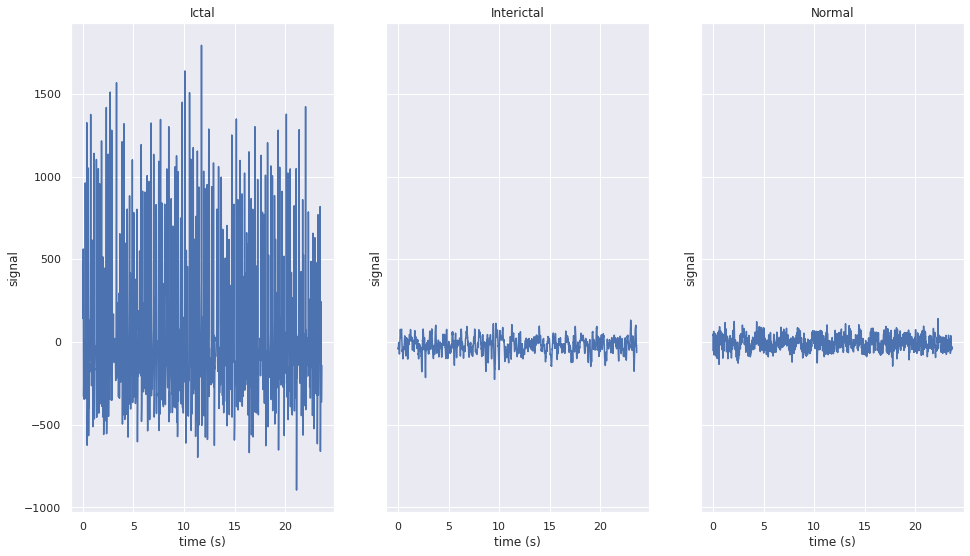

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

from cesium import datasets

eeg = datasets.fetch_andrzejak()

# Group together classes (Z, O), (N, F), (S) as normal, interictal, ictal
eeg["classes"] = eeg["classes"].astype("U16") #  allocate memory for longer class names
eeg["classes"][np.logical_or(eeg["classes"]=="Z", eeg["classes"]=="O")] = "Normal"
eeg["classes"][np.logical_or(eeg["classes"]=="N", eeg["classes"]=="F")] = "Interictal"
eeg["classes"][eeg["classes"]=="S"] = "Ictal"

fig, ax = plt.subplots(1, len(np.unique(eeg["classes"])), sharey=True)
for label, subplot in zip(np.unique(eeg["classes"]), ax):
    i = np.where(eeg["classes"] == label)[0][0]
    subplot.plot(eeg["times"][i], eeg["measurements"][i])
    subplot.set(xlabel="time (s)", ylabel="signal", title=label)

In [61]:
from cesium import featurize
features_to_use = ["amplitude",
                   "percent_beyond_1_std",
                   "maximum",
                   "max_slope",
                   "median",
                   "median_absolute_deviation",
                   "percent_close_to_median",
                   "minimum",
                   "skew",
                   "std",
                   "weighted_average"]
fset_cesium = featurize.featurize_time_series(times=eeg["times"],
                                              values=eeg["measurements"],
                                              errors=None,
                                              features_to_use=features_to_use)
print(fset_cesium.head())

feature amplitude percent_beyond_1_std maximum     max_slope median  \
channel         0                    0       0             0      0   
0           143.5             0.327313   141.0  11107.796610   -4.0   
1           211.5             0.290212   169.0  20653.559322  -51.0   
2           165.0             0.302660   184.0  13537.627119   13.0   
3           171.5             0.300952   162.0  17008.813559   -4.0   
4           170.0             0.305101   152.0  13016.949153  -18.0   

feature median_absolute_deviation percent_close_to_median minimum      skew  \
channel                         0                       0       0         0   
0                            28.0                0.505004  -146.0  0.032805   
1                            32.0                0.640469  -254.0 -0.092715   
2                            31.0                0.515987  -146.0 -0.004100   
3                            31.0                0.541128  -181.0  0.063678   
4                           